In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Dataset Asli

In [2]:
hotel =pd.read_csv('hotel_bookings_data.csv')
hotel.sample(5,random_state = 42)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
30946,Resort Hotel,0,203,2018,February,49,2,2,5,2,...,4,No Deposit,250.0,NaN,0,Personal,66.8,0,0,Check-Out
40207,City Hotel,1,82,2017,September,29,16,0,3,2,...,0,No Deposit,9.0,NaN,0,Personal,76.5,0,0,Canceled
103708,City Hotel,0,25,2018,February,53,27,0,3,3,...,2,No Deposit,220.0,NaN,0,Family,60.0,0,1,Check-Out
85144,City Hotel,0,1,2018,May,11,9,0,1,1,...,0,No Deposit,9.0,NaN,0,Family,95.0,0,0,Check-Out
109991,City Hotel,0,70,2019,June,16,16,2,2,2,...,0,No Deposit,9.0,NaN,0,Personal,108.0,0,0,Check-Out


In [3]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
# mengecek type data pada dataset
hotel.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_weekdays_nights            int64
adults                              int64
children                          float64
babies                              int64
meal                               object
city                               object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
booking_changes                     int64
deposit_type                       object
agent                             float64
company                           float64
days_in_waiting_list              

In [8]:
# melihat jumlah missing value
hotel.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_weekdays_nights               0
adults                                 0
children                               4
babies                                 0
meal                                   0
city                                 488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_list                   0
customer_type   

This dataset has 119,390 rows and 29 columns, of which 4 columns have missing values. These columns are the children, city, agent, and company columns. The data types for all columns are correct. There is a target column, namely the is_canceled column. Then I copied the data before processing the missing value handles and others.

## Dataset Copy

In [9]:
# melakukan copy dataset 
df =hotel.copy()

In [10]:
df.sample(5, random_state=42)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
30946,Resort Hotel,0,203,2018,February,49,2,2,5,2,...,4,No Deposit,250.0,NaN,0,Personal,66.8,0,0,Check-Out
40207,City Hotel,1,82,2017,September,29,16,0,3,2,...,0,No Deposit,9.0,NaN,0,Personal,76.5,0,0,Canceled
103708,City Hotel,0,25,2018,February,53,27,0,3,3,...,2,No Deposit,220.0,NaN,0,Family,60.0,0,1,Check-Out
85144,City Hotel,0,1,2018,May,11,9,0,1,1,...,0,No Deposit,9.0,NaN,0,Family,95.0,0,0,Check-Out
109991,City Hotel,0,70,2019,June,16,16,2,2,2,...,0,No Deposit,9.0,NaN,0,Personal,108.0,0,0,Check-Out


In [11]:
# melakukan pemisahan antara kolom kategori dan numerical 
cat= df.select_dtypes(include='object')
num= df.drop(columns=cat.columns)

In [27]:
cat.describe(include='all').T

,count,unique,top,freq
hotel,119390,2,City Hotel,79330
arrival_date_month,119390,12,October,13877
meal,119390,5,Breakfast,92310
city,118902,177,Kota Denpasar,48590
market_segment,119390,8,Online TA,56477
distribution_channel,119390,5,TA/TO,97870
deposit_type,119390,3,No Deposit,104641
customer_type,119390,4,Personal,89613
reservation_status,119390,3,Check-Out,75166


Untuk kolom - kolom kategorikal, 

In [28]:
# Menampilkan deskripsi kolom-kolom dengan nilai unik
for column in cat.columns:
    unique_values = cat[column].unique()
    print(f"Kolom: {column}")
    print(f"Jumlah unik: {len(unique_values)}")
    print(f"Nilai unik: {unique_values}")
    print()

Kolom: hotel
Jumlah unik: 2
Nilai unik: ['Resort Hotel' 'City Hotel']

Kolom: arrival_date_month
Jumlah unik: 12
Nilai unik: ['September' 'October' 'November' 'December' 'January' 'February' 'March'
 'April' 'May' 'June' 'July' 'August']

Kolom: meal
Jumlah unik: 5
Nilai unik: ['Breakfast' 'Full Board' 'Dinner' 'No Meal' 'Undefined']

Kolom: city
Jumlah unik: 178
Nilai unik: ['Kota Denpasar' 'Kabupaten Bangka' 'Kabupaten Sleman' 'Kota Batu'
 'Kota Malang' 'Kota Yogyakarta' nan 'Kabupaten Tangerang' 'Kota Semarang'
 'Kota Serang' 'Kota Tangerang' 'Kota Bogor' 'Kabupaten Bandung'
 'Kabupaten Magelang' 'Kabupaten Sumedang' 'Kota Jakarta Timur'
 'Kabupaten Purwakarta' 'Kabupaten Kepulauan Seribu' 'Kabupaten Belitung'
 'Kota Jakarta Pusat' 'Kota Jakarta Selatan' 'Kota Surabaya'
 'Kota Jakarta Utara' 'Kota Gorontalo' 'Kota Jambi' 'Kota Jakarta Barat'
 'Kota Bengkulu' 'Kabupaten Bandung Barat' 'Kabupaten Bekasi'
 'Kabupaten Bogor' 'Kabupaten Ciamis' 'Kabupaten Cianjur'
 'Kabupaten Cirebon' 'K

In [29]:
 num.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2018.156554,0.707476,2017.00,2018.00,2018.000,2019.0,2019.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_weekdays_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


In [49]:
# Menampilkan kolom yang memiliki missing value 
score_missing = df.isnull().sum() # mendefinisikan total missing value
df_missing = score_missing[score_missing > 0] # mengambil kolom yang memiliki missing diatas 0
print("Kolom dengan nilai yang hilang:")
for column in df_missing.index:
    print(f"Kolom: {column}")
    print(f"Jumlah Missing:{score_missing[column]}")
    print()

Kolom dengan nilai yang hilang:
Kolom: children
Jumlah Missing:4

Kolom: city
Jumlah Missing:488

Kolom: agent
Jumlah Missing:16340

Kolom: company
Jumlah Missing:112593



In [61]:
df['market_segment'].value_counts()

Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: market_segment, dtype: int64

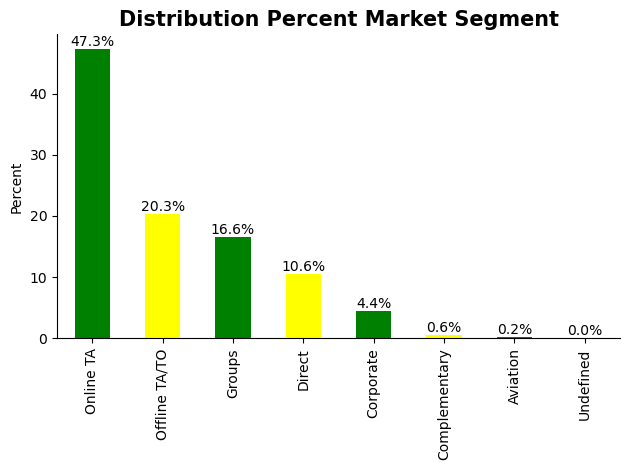

In [82]:
market = df['market_segment'].value_counts()
market = (market/ len(df))*100

ax = market.plot(kind ='bar', color=['green','yellow'])
plt.ylabel('Percent')
plt.title('Distribution Percent Market Segment',weight='bold', fontsize=15)

sns.despine()
plt.tight_layout()
plt.xticks(rotation='vertical')

for i, v in enumerate(market):
    ax.text(i, v, f'{v:.1f}%', ha='center', va='bottom')

plt.show()

In [58]:
df['meal'].value_counts()

Breakfast     92310
Dinner        14463
No Meal       11819
Full Board      798
Name: meal, dtype: int64

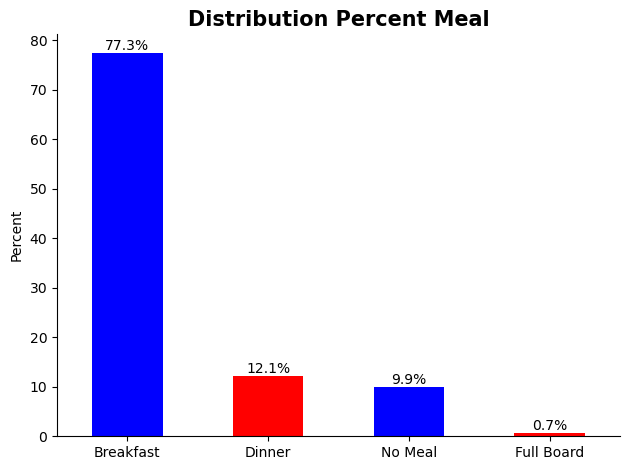

In [81]:
Meal = df['meal'].value_counts()
Meal = (Meal / len(df))*100

ax = Meal.plot(kind='bar', color= ['blue', 'red'])
plt.ylabel('Percent')
plt.title('Distribution Percent Meal',weight='bold', fontsize=15)
plt.xticks(rotation =0)
plt.tight_layout()
sns.despine()

for i , v in enumerate(Meal):
    ax.text(i, v, f'{v:.1f}%', ha='center', va='bottom')

plt.show()

In [62]:
df['customer_type'].value_counts()

Personal     89613
Family       25124
Contract      4076
Bussiness      577
Name: customer_type, dtype: int64

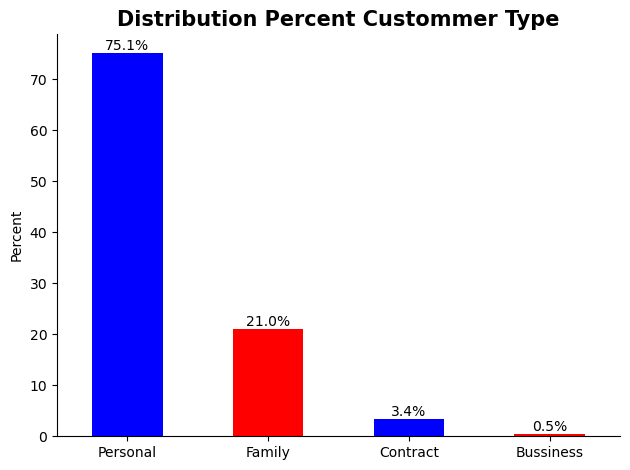

In [80]:
customer = df['customer_type'].value_counts()
customer = (customer / len(df))*100

ax = customer.plot(kind='bar', color= ['blue', 'red'])
plt.ylabel('Percent')
plt.title('Distribution Percent Custommer Type',weight='bold', fontsize=15)
plt.xticks(rotation =0)
plt.tight_layout()
sns.despine()

for i , v in enumerate(customer):
    ax.text(i, v, f'{v:.1f}%', ha='center', va='bottom')

plt.show()

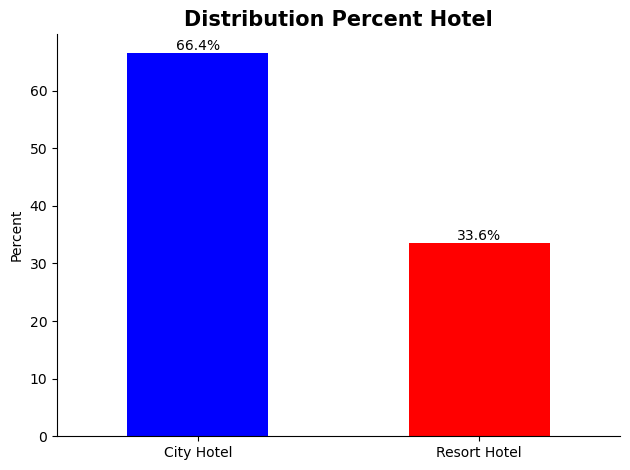

In [79]:
Hotel = df['hotel'].value_counts()
Hotel = (Hotel / len(df))*100

ax = Hotel.plot(kind='bar', color= ['blue', 'red'])
plt.ylabel('Percent')
plt.title('Distribution Percent Hotel',weight='bold', fontsize=15)
plt.xticks(rotation =0)
plt.tight_layout()
sns.despine()

for i , v in enumerate(Hotel):
    ax.text(i, v, f'{v:.1f}%', ha='center', va='bottom')

plt.show()

<AxesSubplot:xlabel='is_canceled', ylabel='count'>

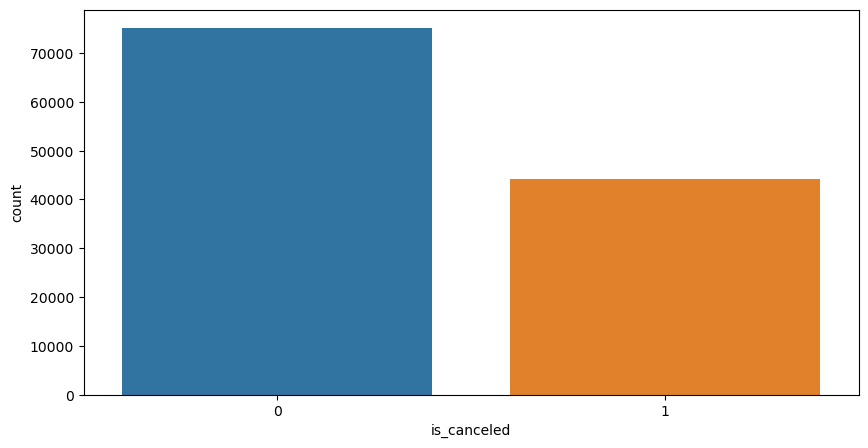

In [77]:
# Dependent Feature 
plt.figure(figsize=(10,5))
sns.countplot(x = 'is_canceled', data = df)

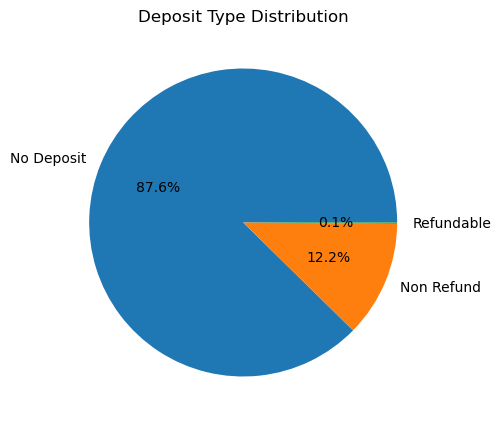

In [89]:
# Menghitung jumlah data pada setiap kategori deposit_type
deposit_counts = df['deposit_type'].value_counts()

# Membuat pie chart
plt.figure(figsize=(10, 5))
plt.pie(deposit_counts, labels=deposit_counts.index, autopct='%.1f%%')

# Menambahkan judul
plt.title('Deposit Type Distribution')

# Menampilkan pie chart
plt.show()

In [51]:
# karena kolom chidren hanya kosong 4 baris saja maka saya menggunakan nilai modus untuk meperbaikinnya. 
modus = df['children'].mode()[0]
modus
#df['children'].fillna(modus, inplace=True)

0.0

In [52]:
df_replace = {'children':0.0,
              'city' :'Unknown',
              'agent' :0}
df_fill=df.fillna(df_replace)

In [53]:
#Untuk kolom company, tidak dapat melakukan perbaikan data dikarenakan jumlah data yang kosong lebih dari 95%. Oleh sebab itu perlu dilakukan drop data.
df.drop(['company'], axis=1, inplace=True)

## Handle invalid value

In [57]:
# melakukan penggabungan untuk value Underfined dengan no meal.
df['meal'].replace('Undefined','No Meal', inplace=True)

### Handle Total Customer

In [63]:
# membuat total customer dengan menjumlahkan kolom adults + children + babies
df['Total_customer']=df['adults']+df['children']+df['babies']

# mendrop kolom adults, children, babies
df.drop(['adults','children','babies'], axis=1, inplace=True)